In [1]:
import numpy as np
import pymannkendall as mk
import pandas as pd
import glob,os
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
er_file = glob.glob("S***.csv")

In [3]:
dl_er = []
out = []
for f in er_file:
    dl_er.append(pd.read_csv(f))

for x in dl_er:
    print(len(x))
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        out.append(mk.original_test(x['av_er_ratio']))

22
25
10
22
61
27
27
38
28
10
15
28
47
11
78
14
23
15
9
11
17
4
30
14
21
35
30
41
19
11
69
20
11
5
51
17
10
10
27
10
28
34
33
22
24
19
24
22
9
42
21
22
25
7
43
16
32
12
17
12
53
11
72
49
5
30
8
5
51
13
12
11
10
5
14
10
32
6
14
12
5
28
10
9
29
18
20
61
28
6
21
6
9
27
10
17
49
16
11
13
11
33
6
8
8
15
56
9
52
11
7
7
28
12
19
8
56
4
4
8
32
14
20
9
55
8
64
5
12
17
5
50
6
20
50
14
8
4
9
24
10
10
51
8
11
10
27
42
40
30
9
8
21
43
76
40
60
23
11
5
6
13
15
56
30
14
7
11
4
17
7
41
5
6
5
10
6
33
47
12
16
20
33
10
16
27
17
5
19
16
46
4
14
11
14
8
36
5
5
22
18
6
10
7
20
7
34
21
22
25
11
2
11
35
20
50
15
44
12
8
7
11
16
35
7
7
14
18
20
7
14
34
11
14
25
104
24
26
17
10
6
9
22
9
12
19
45
15
22
9
21
25
4
16
44
8
8
19
36
20
17
9
8
32
17
4
6
24
90
14
20
49
14
21
38
15
10
7
8
13
54
11
15
13
38
11
20
6
19
34
5
7
11
30
17
12
25
10
6
40
21
8
26
29
20
36
9
61
7
4
48
10
67
27
5
5
12
7
13
12
11
31
17
25
29
16
29
13
43
20
10
10
13
16


In [4]:
df = pd.concat(dl_er)
df.to_csv('group3_summary.csv', index = False)

In [5]:
df_summary = pd.read_csv('group3_summary.csv')

In [6]:
print(df_summary)

     speaker1  speaker1_token_number  speaker1_expression_token_number  \
0       S0257                    397                                70   
1       S0257                    209                                32   
2       S0257                    156                                94   
3       S0257                    154                                22   
4       S0257                     61                                31   
...       ...                    ...                               ...   
6938    S0326                      3                                 1   
6939    S0326                    130                                62   
6940    S0326                    233                               110   
6941    S0326                    124                                48   
6942    S0326                     41                                20   

      speaker1_expression_number  speaker1_er_ratio speaker2  \
0                             69           0.17

In [7]:
import seaborn as sns

for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['av_er_ratio'].iloc[i] = None

df_summary = df_summary.dropna()
print(df_summary.head())


  speaker1  speaker1_token_number  speaker1_expression_token_number  \
0    S0257                    397                                70   
1    S0257                    209                                32   
2    S0257                    156                                94   
3    S0257                    154                                22   
4    S0257                     61                                31   

   speaker1_expression_number  speaker1_er_ratio speaker2  \
0                          69           0.176322    S0258   
1                          32           0.153110    S0258   
2                          81           0.602564    S0258   
3                          19           0.142857    S0258   
4                          26           0.508197    S0258   

   speaker2_token_number  speaker2_expression_token_number  \
0                     24                                13   
1                     38                                 8   
2                   

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


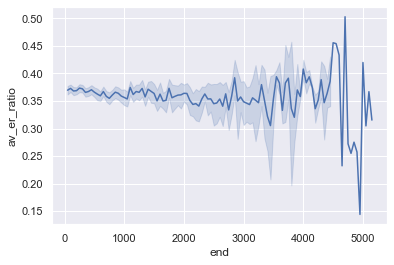

In [8]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=df_summary['end'], y=df_summary['av_er_ratio'])

In [9]:
for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['av_er_ratio'].iloc[i] = None

df_summary = df_summary.dropna()

grouped_df = df_summary.groupby("end")
mean_df = grouped_df['av_er_ratio'].mean()

mean_df = mean_df.reset_index()
print(mean_df)

      end  av_er_ratio
0      50     0.369512
1     100     0.372782
2     150     0.368098
3     200     0.368630
4     250     0.373345
..    ...          ...
98   4950     0.144068
99   5000     0.419753
100  5050     0.304762
101  5100     0.366843
102  5150     0.315261

[103 rows x 2 columns]


Text(0, 0.5, 'Average ER ratio')

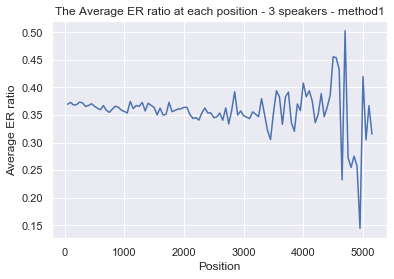

In [10]:
import matplotlib.pyplot as plt
l1=plt.plot(mean_df['end'],mean_df['av_er_ratio'],label='type1')
plt.title('The Average ER ratio at each position - 3 speakers - method1')
plt.xlabel('Position')
plt.ylabel('Average ER ratio')

In [11]:
print(len(dl_er))
print(len(out))
c = 0
for o in out:
    if o.trend == "increasing":
        c = c+1
print(c)
print(263/264)

334
264
7
0.9962121212121212


In [30]:
res = []
for x in dl_er:
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        mod = sm.GLM(x['av_er_ratio'], x['end'], family=sm.families.Gaussian(sm.families.links.log))
        res.append(mod.fit())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """


In [31]:
for r in res:
    print(r.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            av_er_ratio   No. Observations:                   21
Model:                            GLM   Df Residuals:                       20
Model Family:                Gaussian   Df Model:                            0
Link Function:                    log   Scale:                        0.049131
Method:                          IRLS   Log-Likelihood:                 2.3415
Date:                Mon, 03 May 2021   Deviance:                      0.98263
Time:                        05:01:57   Pearson chi2:                    0.983
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
end           -0.0005      0.000     -4.392      0.0

                 Generalized Linear Model Regression Results                  
Dep. Variable:            av_er_ratio   No. Observations:                   20
Model:                            GLM   Df Residuals:                       19
Model Family:                Gaussian   Df Model:                            0
Link Function:                    log   Scale:                        0.031606
Method:                          IRLS   Log-Likelihood:                 6.6654
Date:                Mon, 03 May 2021   Deviance:                      0.60051
Time:                        05:01:57   Pearson chi2:                    0.601
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
end           -0.0005   9.56e-05     -5.098      0.0

                 Generalized Linear Model Regression Results                  
Dep. Variable:            av_er_ratio   No. Observations:                   15
Model:                            GLM   Df Residuals:                       14
Model Family:                Gaussian   Df Model:                            0
Link Function:                    log   Scale:                        0.039351
Method:                          IRLS   Log-Likelihood:                 3.4802
Date:                Mon, 03 May 2021   Deviance:                      0.55092
Time:                        05:01:57   Pearson chi2:                    0.551
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
end           -0.0007      0.000     -4.023      0.0

In [34]:
import scipy.stats
r = []
p = []
for x in dl_er:
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        r1, p1 = scipy.stats.pearsonr(x['end'], x['av_er_ratio'])
        r.append(r1)
        p.append(p1)

print(p)

[0.0023184579904459994, 7.270111976230816e-05, 0.005844608372544808, 4.0128130326422105e-05, 8.094812576786696e-10, 3.1129801055696803e-06, 2.794180367533778e-09, 6.157054388215735e-09, 2.0637477242609566e-06, 0.3768136402207596, 0.014304941656989065, 2.3460703230912744e-05, 1.8996441703480584e-08, 0.01816317162428457, 2.2661090998820497e-10, 0.0032545707013734554, 2.0913257067153817e-08, 1.7849177363859966e-05, 0.008926404563796177, 0.00783486816508145, 3.853282170701565e-05, 2.3180700821517235e-05, 3.7726147184671255e-05, 9.076814216120271e-06, 2.9805368892443512e-05, 1.7800656544366519e-06, 2.9717165253506718e-08, 0.6194442805352715, 0.0020065841531459044, 2.6377316660581437e-13, 0.0011192245360288782, 0.1640587048238207, 1.6152828568262286e-10, 2.849176507817204e-06, 0.09460274624927995, 0.006780451389496892, 2.3541509623993007e-06, 0.031820526754389275, 0.00022460691895984068, 1.3927514173990955e-07, 1.0413499813806644e-09, 1.2476539565738752e-06, 1.2487429945853753e-05, 1.9619275